In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [11]:
!pwd


/content


In [23]:
!ls -lh /content



total 2.1M
-rw-r--r-- 1 root root 2.1M Dec 23 04:26 sales_data.csv


In [24]:
import pandas as pd

df = pd.read_csv('/content/sales_data.csv', nrows=5)
print(df)
print(df.columns)


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08-11-2017  11-11-2017    Second Class    CG-12520   
1       2  CA-2017-152156  08-11-2017  11-11-2017    Second Class    CG-12520   
2       3  CA-2017-138688  12-06-2017  16-06-2017    Second Class    DV-13045   
3       4  US-2016-108966  11-10-2016  18-10-2016  Standard Class    SO-20335   
4       5  US-2016-108966  11-10-2016  18-10-2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [29]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)


In [30]:
df.isnull().sum()
df = df.dropna()
df = df.sort_values('Order Date')
df['Month'] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

monthly_sales['Month'] = monthly_sales['Month'].astype(str)
monthly_sales.head()


,Month,Sales
0,2016-10,979.9455
1,2017-06,14.6200
2,2017-11,993.9000


In [31]:
prophet_df = monthly_sales.rename(columns={
    'Month': 'ds',
    'Sales': 'y'
})

prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])
prophet_df.head()


,ds,y
0,2016-10-01,979.9455
1,2017-06-01,14.6200
2,2017-11-01,993.9000


In [32]:
!pip install prophet
from prophet import Prophet

model = Prophet()
model.fit(prophet_df)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.


In [33]:
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)
forecast.head()


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-10-01,727.695166,214.727991,1288.263758,727.695166,727.695166,0.0,0.0,0.0,0.0,0.0,0.0,727.695166
1,2017-06-01,650.568666,150.713821,1165.788278,650.568666,650.568666,0.0,0.0,0.0,0.0,0.0,0.0,650.568666
2,2017-11-01,602.007536,102.514317,1153.773668,602.007536,602.007536,0.0,0.0,0.0,0.0,0.0,0.0,602.007536
3,2017-11-30,592.803139,45.661177,1129.823762,592.803139,592.803139,0.0,0.0,0.0,0.0,0.0,0.0,592.803139
4,2017-12-31,582.963956,55.788441,1124.564822,582.963956,582.963956,0.0,0.0,0.0,0.0,0.0,0.0,582.963956


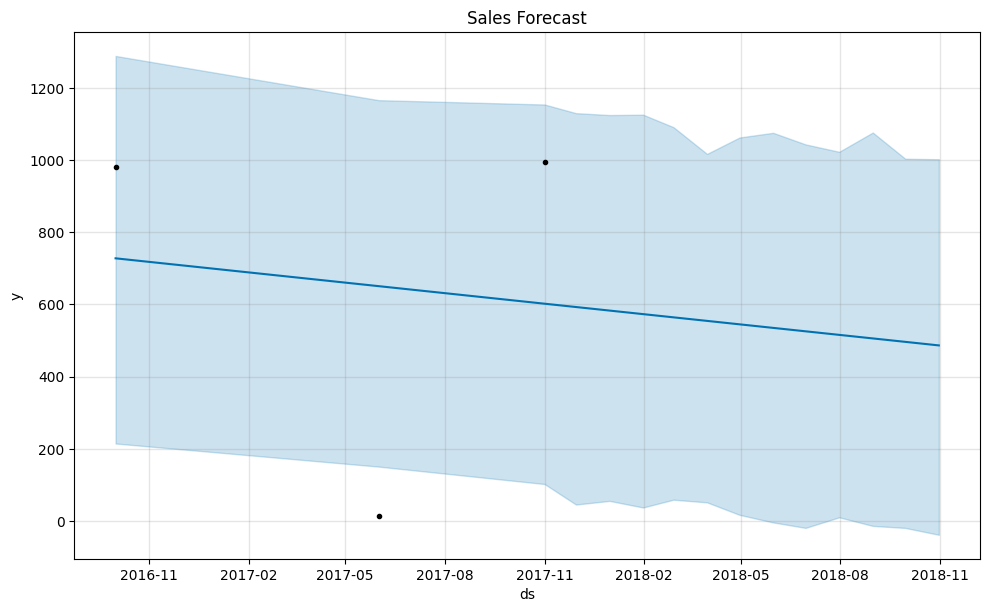

In [34]:
model.plot(forecast)
plt.title("Sales Forecast")
plt.show()


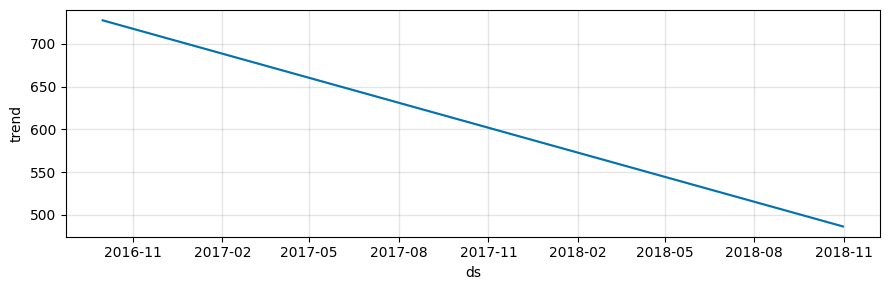

In [35]:
model.plot_components(forecast)
plt.show()


In [36]:
forecast_output = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_output.to_csv('forecast_results.csv', index=False)


In [37]:
from google.colab import files
files.download('forecast_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
# Save historical monthly data
monthly_sales.to_csv('monthly_sales.csv', index=False)

# Download files
from google.colab import files
files.download('monthly_sales.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(
    'forecast_results.csv', index=False
)

files.download('forecast_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>